In [1]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName('New').getOrCreate()

In [8]:
df=spark.read.csv('F:/desktop/Spark/datasets/Iris.csv',inferSchema=True,header=True)

In [9]:
df.show()

+---+-------------+------------+-------------+------------+-----------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|
+---+-------------+------------+-------------+------------+-----------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|
|  9|          4.4|         2.9|          1.4|         0.2|Iris-setosa|
| 10|          4.9|         3.1|          1.5|         0.1|Iris-setosa|
| 11|          5.4|         3.7|          1.5|         0.2|Iris-

In [10]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- SepalLengthCm: double (nullable = true)
 |-- SepalWidthCm: double (nullable = true)
 |-- PetalLengthCm: double (nullable = true)
 |-- PetalWidthCm: double (nullable = true)
 |-- Species: string (nullable = true)



In [11]:
from pyspark.sql import SparkSession
# May take a little while on a local computer
spark = SparkSession.builder.appName("missingdata").getOrCreate()

In [12]:
from pyspark.ml.feature import VectorAssembler
va=VectorAssembler(inputCols=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],outputCol='features')
output=va.transform(df)
output.show()

+---+-------------+------------+-------------+------------+-----------+-----------------+
| Id|SepalLengthCm|SepalWidthCm|PetalLengthCm|PetalWidthCm|    Species|         features|
+---+-------------+------------+-------------+------------+-----------+-----------------+
|  1|          5.1|         3.5|          1.4|         0.2|Iris-setosa|[5.1,3.5,1.4,0.2]|
|  2|          4.9|         3.0|          1.4|         0.2|Iris-setosa|[4.9,3.0,1.4,0.2]|
|  3|          4.7|         3.2|          1.3|         0.2|Iris-setosa|[4.7,3.2,1.3,0.2]|
|  4|          4.6|         3.1|          1.5|         0.2|Iris-setosa|[4.6,3.1,1.5,0.2]|
|  5|          5.0|         3.6|          1.4|         0.2|Iris-setosa|[5.0,3.6,1.4,0.2]|
|  6|          5.4|         3.9|          1.7|         0.4|Iris-setosa|[5.4,3.9,1.7,0.4]|
|  7|          4.6|         3.4|          1.4|         0.3|Iris-setosa|[4.6,3.4,1.4,0.3]|
|  8|          5.0|         3.4|          1.5|         0.2|Iris-setosa|[5.0,3.4,1.5,0.2]|
|  9|     

In [13]:
df=output.select('features','Species')
df.show()

+-----------------+-----------+
|         features|    Species|
+-----------------+-----------+
|[5.1,3.5,1.4,0.2]|Iris-setosa|
|[4.9,3.0,1.4,0.2]|Iris-setosa|
|[4.7,3.2,1.3,0.2]|Iris-setosa|
|[4.6,3.1,1.5,0.2]|Iris-setosa|
|[5.0,3.6,1.4,0.2]|Iris-setosa|
|[5.4,3.9,1.7,0.4]|Iris-setosa|
|[4.6,3.4,1.4,0.3]|Iris-setosa|
|[5.0,3.4,1.5,0.2]|Iris-setosa|
|[4.4,2.9,1.4,0.2]|Iris-setosa|
|[4.9,3.1,1.5,0.1]|Iris-setosa|
|[5.4,3.7,1.5,0.2]|Iris-setosa|
|[4.8,3.4,1.6,0.2]|Iris-setosa|
|[4.8,3.0,1.4,0.1]|Iris-setosa|
|[4.3,3.0,1.1,0.1]|Iris-setosa|
|[5.8,4.0,1.2,0.2]|Iris-setosa|
|[5.7,4.4,1.5,0.4]|Iris-setosa|
|[5.4,3.9,1.3,0.4]|Iris-setosa|
|[5.1,3.5,1.4,0.3]|Iris-setosa|
|[5.7,3.8,1.7,0.3]|Iris-setosa|
|[5.1,3.8,1.5,0.3]|Iris-setosa|
+-----------------+-----------+
only showing top 20 rows



In [14]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol='Species',outputCol='encoded_label')
df1=indexer.fit(df).transform(df)
df1.show()

+-----------------+-----------+-------------+
|         features|    Species|encoded_label|
+-----------------+-----------+-------------+
|[5.1,3.5,1.4,0.2]|Iris-setosa|          0.0|
|[4.9,3.0,1.4,0.2]|Iris-setosa|          0.0|
|[4.7,3.2,1.3,0.2]|Iris-setosa|          0.0|
|[4.6,3.1,1.5,0.2]|Iris-setosa|          0.0|
|[5.0,3.6,1.4,0.2]|Iris-setosa|          0.0|
|[5.4,3.9,1.7,0.4]|Iris-setosa|          0.0|
|[4.6,3.4,1.4,0.3]|Iris-setosa|          0.0|
|[5.0,3.4,1.5,0.2]|Iris-setosa|          0.0|
|[4.4,2.9,1.4,0.2]|Iris-setosa|          0.0|
|[4.9,3.1,1.5,0.1]|Iris-setosa|          0.0|
|[5.4,3.7,1.5,0.2]|Iris-setosa|          0.0|
|[4.8,3.4,1.6,0.2]|Iris-setosa|          0.0|
|[4.8,3.0,1.4,0.1]|Iris-setosa|          0.0|
|[4.3,3.0,1.1,0.1]|Iris-setosa|          0.0|
|[5.8,4.0,1.2,0.2]|Iris-setosa|          0.0|
|[5.7,4.4,1.5,0.4]|Iris-setosa|          0.0|
|[5.4,3.9,1.3,0.4]|Iris-setosa|          0.0|
|[5.1,3.5,1.4,0.3]|Iris-setosa|          0.0|
|[5.7,3.8,1.7,0.3]|Iris-setosa|   

In [15]:
df1=df1.select('features','encoded_label')
df1.show()

+-----------------+-------------+
|         features|encoded_label|
+-----------------+-------------+
|[5.1,3.5,1.4,0.2]|          0.0|
|[4.9,3.0,1.4,0.2]|          0.0|
|[4.7,3.2,1.3,0.2]|          0.0|
|[4.6,3.1,1.5,0.2]|          0.0|
|[5.0,3.6,1.4,0.2]|          0.0|
|[5.4,3.9,1.7,0.4]|          0.0|
|[4.6,3.4,1.4,0.3]|          0.0|
|[5.0,3.4,1.5,0.2]|          0.0|
|[4.4,2.9,1.4,0.2]|          0.0|
|[4.9,3.1,1.5,0.1]|          0.0|
|[5.4,3.7,1.5,0.2]|          0.0|
|[4.8,3.4,1.6,0.2]|          0.0|
|[4.8,3.0,1.4,0.1]|          0.0|
|[4.3,3.0,1.1,0.1]|          0.0|
|[5.8,4.0,1.2,0.2]|          0.0|
|[5.7,4.4,1.5,0.4]|          0.0|
|[5.4,3.9,1.3,0.4]|          0.0|
|[5.1,3.5,1.4,0.3]|          0.0|
|[5.7,3.8,1.7,0.3]|          0.0|
|[5.1,3.8,1.5,0.3]|          0.0|
+-----------------+-------------+
only showing top 20 rows



In [16]:
(train,test)=df1.randomSplit([0.8,0.2])


In [19]:
from pyspark.ml.classification import DecisionTreeClassifier
clf=DecisionTreeClassifier(featuresCol='features',labelCol='encoded_label')
clf=clf.fit(train)

In [20]:
pred=clf.transform(test)
pred.show(3)

+-----------------+-------------+--------------+-------------+----------+
|         features|encoded_label| rawPrediction|  probability|prediction|
+-----------------+-------------+--------------+-------------+----------+
|[4.6,3.2,1.4,0.2]|          0.0|[41.0,0.0,0.0]|[1.0,0.0,0.0]|       0.0|
|[4.7,3.2,1.6,0.2]|          0.0|[41.0,0.0,0.0]|[1.0,0.0,0.0]|       0.0|
|[4.8,3.0,1.4,0.3]|          0.0|[41.0,0.0,0.0]|[1.0,0.0,0.0]|       0.0|
+-----------------+-------------+--------------+-------------+----------+
only showing top 3 rows



In [27]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from sklearn.metrics import confusion_matrix
evaluator= MulticlassClassificationEvaluator(predictionCol='prediction',labelCol='encoded_label',
                                             metricName='accuracy')

                                             
acc = evaluator. evaluate(pred)
print ('Prediction Accuracy:', acc)
       
y_pred=pred.select ("prediction").collect()
y_orig=pred.select ("encoded_label").collect()
       
cm = confusion_matrix(y_orig, y_pred)
print("Confusion Matrix:")
print(cm)

Prediction Accuracy: 0.9705882352941176
Confusion Matrix:
[[ 9  0  0]
 [ 0 15  0]
 [ 0  1  9]]


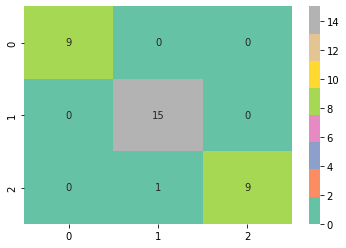

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(cm,annot=True,cmap='Set2',cbar=True)
plt.show()